In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [45]:
df = pd.read_csv("medical_examination.csv")

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
**Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.**
Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

**Agrego la columna "sobrepeso"** OKAY

In [46]:
BMI = df.weight / (df.height / 100) ** 2

overweight = BMI > 25
overweight[overweight == True] = 1
overweight[overweight == False] = 0

# Hasta la sentencia anterior, la variable overweight era de tipo OBJECT (?). Por lo tanto, la convertí
# a enteros!!!

overweight = np.asarray(overweight, dtype=int)

df["overweight"] = overweight

**Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.** OKAY (In dataframe dfB, ver mas abajo)

In [47]:
# OJO QUE TODO ESTO NO ESTÁ CREANDO UNA COPIA DE LA COLUMNA 'GLUC'. SE ESTA REFIRIENDO AL MISMO OBJETO
# POR LO CUAL ESTÁ MODIFICANDO DIRECTAMENTE EL DATA FRAME!!! OJOOOO

# A=pd.Series(df['gluc'])
# print(A, type(A))
# A[A==1] = 0

# LA FORMA CORRECTA DE HACER UNA COPIA ES LA SIGUIENTE

# To avoid overwriting I make a copy of the DATA FRAME
dfB = copy.deepcopy(df)

gluc = copy.deepcopy(df["gluc"])
# gluc is df['gluc']

# Now I modify the values of 'gluc' previous to add them to de dataframe dfB
gluc[gluc == 1] = 0
gluc[gluc > 1] = 1
dfB["gluc"] = gluc

# I follow the same logic for column CHOLESTEROL
chol = copy.deepcopy(df["cholesterol"])
chol[chol == 1] = 0
chol[chol > 1] = 1
dfB["cholesterol"] = chol

In [48]:
# dfB['gluc'] != df['gluc'] #Asi verifico que los valores fueron efectivamente cambiados
# dfB['cholesterol'] != df['cholesterol']

Ahora tengo el dataframe dfB, el cual ha sido modificado. Se agregó la columna overweight
y se normalizaron las variables categoricas gluc y cholesterol

**Lo siguiente es convertir la tabla de un wide format a un long format** 
Lo cual se hace utilizando el metodo **pd.melt**. Esto genera un data frame mas estirado, por decirlo de alguna manera

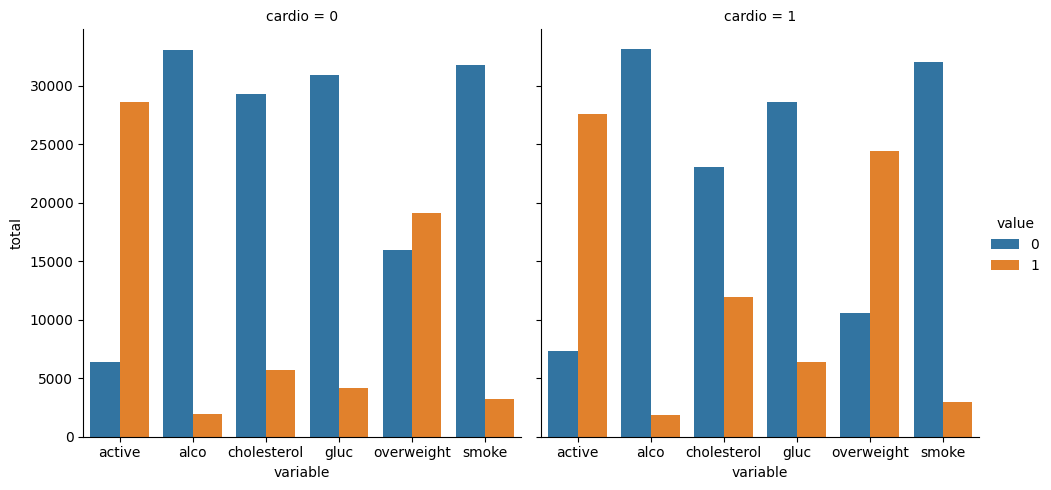

In [49]:
def draw_cat_plot():
    dfB_long = pd.melt(
        dfB,
        id_vars="cardio",
        value_vars=["cholesterol", "gluc", "alco", "smoke", "active", "overweight"],
    )

    for col in ["cardio", "variable"]:
        dfB_long[col] = dfB_long[col].astype("category")


g = sns.catplot(
    x="variable", col="cardio", data=dfB_long, hue="value", kind="count", orient="v"
)
g.set_axis_labels("variable", "total")

fig = g.figure


draw_cat_plot()

**Clean the data.** Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

**Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.**

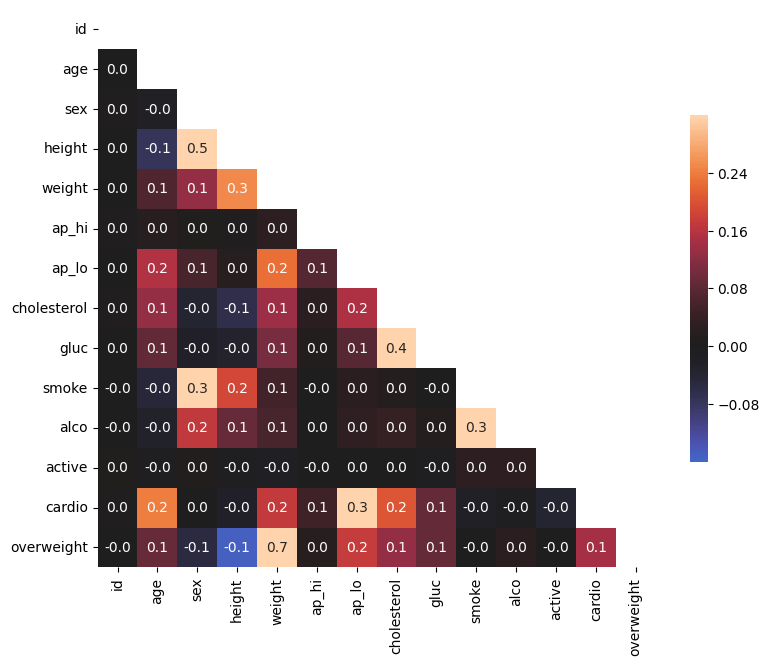

In [52]:
def draw_heat_map():
    # The dataframe is cleaned ALL AT ONCE
    df_fixed = dfB[
        (dfB["ap_lo"] <= dfB["ap_hi"])
        & (dfB["height"] >= dfB["height"].quantile(0.025))
        & (dfB["height"] <= dfB["height"].quantile(0.975))
        & (dfB["weight"] >= dfB["weight"].quantile(0.025))
        & (dfB["weight"] <= dfB["weight"].quantile(0.975))
    ]

    corr_matrix = df_fixed.corr()

    upper_triangle = np.triu(corr_matrix)

    fig = plt.figure()
    fig.set_size_inches(9, 9)
    sns.heatmap(corr_matrix, mask=upper_triangle, fmt=".1f", annot=True, square=True,
                vmin=-0.16, vmax=0.32, center=0.0, 
                cbar_kws={'shrink': 0.5, 'ticks': [0.24, 0.16, 0.08, 0.00, -0.08]})

    fig.savefig("heatmap.png")


draw_heat_map()